In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc
import scipy.constants as sc

In [2]:
def remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2):
    "Remove apertures of off-momentum BPMs which give flanges as bottlenecks"
    tw = line.twiss()
    tt = line.get_table()
    mask_disp = 5*np.sqrt(tw.betx*exn*pmass/nrj)+n_buckets*bucket_height*tw.dx > 0.025
    mask_bpm = ['bp' in name for name in tt.name]
    mask_aper = np.array(['aper' in name for name in tt.name])
    offmom_bpms = tt.name[mask_disp & mask_bpm & ~mask_aper]
    aper_to_remove = [f'{name}{suffix}' for name in offmom_bpms for suffix in ('.a_aper', '.b_aper')]
    line.remove(aper_to_remove)

In [3]:
sigma_x_min = -10
sigma_x_max = 10
x_norm = np.linspace(
    sigma_x_min,
    sigma_x_max,
    int(sigma_x_max - sigma_x_min) + 1
)

delta_min = -1e-2
delta_max = 1e-2
delta_step = 1e-3
deltas = np.linspace(
    delta_min,
    delta_max,
    int((delta_max - delta_min) / delta_step) + 1
)

num_particles = len(x_norm) * len(deltas)

In [4]:
num_turns = 6000
nemitt_x = 2e-6
nemitt_y = 2e-6
sigma_z = 0.224

In [5]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
# line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
tw = line.twiss()
env = line.env
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2)

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [6]:
bpms_hor = ['bph.10208', 'bph.10408', 'bph.10608', 'bph.10808', 
            'bph.11008', 'bph.11208', 'bph.11408', 'bph.11608', 'bph.11831', 
            'bph.12008', 'bph.12208', 'bph.12408', 'bph.12608', 'bph.12808', 
            'bph.13008', 'bph.13208', 'bph.13408', 'bph.13608', 
            'bph.20208', 'bph.20408', 'bph.20608', 'bph.20808', 
            'bph.21008', 'bph.21208', 'bph.21408', 
            'bph.22008', 'bph.22208', 'bph.22408', 'bph.22608', 'bph.22808', 
            'bph.23008', 'bph.23208', 'bph.23408', 'bph.23608', 
            'bph.30208', 'bph.30408', 'bph.30608', 'bph.30808', 
            'bph.31008', 'bph.31208', 'bph.31408', 'bph.31608', 'bph.31808', 
            'bph.32008', 'bph.32208', 'bph.32408', 'bph.32608', 'bph.32808', 
            'bph.33008', 'bph.33208', 'bph.33408', 'bph.33608', 
            'bph.40208', 'bph.40408', 'bph.40608', 'bph.40808', 
            'bph.41008', 'bph.41208', 'bph.41408', 'bph.41607', #Mistake in bpm name (lsa name is bph.41608, not 7)
            'bph.42008', 'bph.42208', 'bph.42408', 'bph.42608', 'bph.42808', 
            'bph.43008', 'bph.43208', 'bph.43408', 'bph.43608', 
            'bph.50208', 'bph.50408', 'bph.50608', 'bph.50808', 
            'bph.51008', 'bph.51208', 'bph.51408', 
            'bph.52008', 'bph.52208', 'bph.52408', 'bph.52608', 'bph.52808', 
            'bph.53008', 'bph.53208', 'bph.53408', 'bph.53608', 
            'bph.60208', 'bph.60408', 'bph.60608', 'bph.60808', 
            'bph.61008', 'bph.61208', 'bph.61408', 'bph.61608', 
            'bph.62008', 'bph.62208', 'bph.62408', 'bph.62608', 'bph.62808', 
            'bph.63008', 'bph.63208', 'bph.63408', 'bph.63608']

In [7]:
tw = line.twiss()

In [9]:
import re
import xtrack as xt

line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')

qd_bottlenecks = [
    'qd.62910', 'qd.10110',
    'qd.11110',
    'qd.12510',
    'qd.13510', 'qd.20110',
    'qd.21110',
    'qd.22510',
    'qd.23510', 'qd.30110',
    'qd.31110',
    'qd.32510',
    'qd.33510', 'qd.40110',
    'qd.41110',
    'qd.42510',
    'qd.43510', 'qd.50110',
    'qd.51110',
    'qd.52510',
    'qd.53510', 'qd.60110',
    'qd.61110',
    'qd.62510'
]

# --- helpers ---------------------------------------------------------------

_bph_re = re.compile(r"^bph\.", re.IGNORECASE)

def _is_bph(name: str) -> bool:
    return bool(_bph_re.match(name))

def _nearest_bph_before_after(names, idx):
    """Return (bph_before, bph_after) around names[idx]. None if not found."""
    before = None
    for j in range(idx - 1, -1, -1):
        if _is_bph(names[j]):
            before = names[j]
            break

    after = None
    for j in range(idx + 1, len(names)):
        if _is_bph(names[j]):
            after = names[j]
            break

    return before, after

# --- main logic ------------------------------------------------------------

# Use Twiss ordering (preferred, since it's the actual s-order along the line)
tw = line.twiss()
names_in_order = list(tw.name)

# Map name -> index in the twiss-ordered list
name_to_idx = {nn: ii for ii, nn in enumerate(names_in_order)}

bph_around_qd = {}   # qd_name -> {"before": ..., "after": ...}

missing_qds = []
for qd in qd_bottlenecks:
    idx = name_to_idx.get(qd)
    if idx is None:
        missing_qds.append(qd)
        bph_around_qd[qd] = {"before": None, "after": None}
        continue

    bph_before, bph_after = _nearest_bph_before_after(names_in_order, idx)
    bph_around_qd[qd] = {"before": bph_before, "after": bph_after}

# --- results ---------------------------------------------------------------

# dict you asked for: bph_around_qd
# quick printout (optional):
for qd, bb in bph_around_qd.items():
    print(f"{qd:10s}  before: {bb['before']!s:12s}  after: {bb['after']!s}")

if missing_qds:
    print("\nWARNING: these quadrupoles were not found in tw.name:")
    for qd in missing_qds:
        print("  -", qd)


Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           
qd.62910    before: bph.62808     after: bph.63008
qd.10110    before: None          after: bph.10208
qd.11110    before: bph.11008     after: bph.11208
qd.12510    before: bph.12408     after: bph.12608
qd.13510    before: bph.13408     after: bph.13608
qd.20110    before: bph.13608     after: bph.20203
qd.21110    before: bph.21008     after: bph.21208
qd.22510    before: bph.22408     after: bph.22608
qd.23510    before: bph.23408     after: bph.23608
qd.30110    before: bph.23608     after: bph.30208
qd.31110    before: bph.31008     after: bph.31208
qd.32510    before: bph.32408     after: bph.32608
qd.33510    before: bph.33408     after: bph.33608
qd.40110    before: bph.33608     after: bph.40208
qd.41110    before: bph.41008     after: bph.41208
qd.42510    before: bph.42408     after: bph.42608
qd.43510    before: bph.43408     after: bph.43608
qd.50110    before: bph.43608     after: bph.50208
qd.51110    before: bph.51008     after: b

In [10]:
bph_around_qd['qd.62910']['before'] = 'bph.63608'

In [11]:
bph_around_qd['qd.10110']['before'] = 'bph.63608'

In [12]:
for qd, bb in bph_around_qd.items():
    print(f"{qd:10s}  before: {bb['before']!s:12s}  after: {bb['after']!s}")

qd.62910    before: bph.63608     after: bph.63008
qd.10110    before: bph.63608     after: bph.10208
qd.11110    before: bph.11008     after: bph.11208
qd.12510    before: bph.12408     after: bph.12608
qd.13510    before: bph.13408     after: bph.13608
qd.20110    before: bph.13608     after: bph.20203
qd.21110    before: bph.21008     after: bph.21208
qd.22510    before: bph.22408     after: bph.22608
qd.23510    before: bph.23408     after: bph.23608
qd.30110    before: bph.23608     after: bph.30208
qd.31110    before: bph.31008     after: bph.31208
qd.32510    before: bph.32408     after: bph.32608
qd.33510    before: bph.33408     after: bph.33608
qd.40110    before: bph.33608     after: bph.40208
qd.41110    before: bph.41008     after: bph.41208
qd.42510    before: bph.42408     after: bph.42608
qd.43510    before: bph.43408     after: bph.43608
qd.50110    before: bph.43608     after: bph.50208
qd.51110    before: bph.51008     after: bph.51208
qd.52510    before: bph.52408  

In [13]:
bpms_monitors = sorted({
    bpm
    for v in bph_around_qd.values()
    for bpm in (v["before"], v["after"])
    if bpm is not None
})

In [14]:
bpms_monitors

['bph.10208',
 'bph.11008',
 'bph.11208',
 'bph.12408',
 'bph.12608',
 'bph.13408',
 'bph.13608',
 'bph.20203',
 'bph.21008',
 'bph.21208',
 'bph.22408',
 'bph.22608',
 'bph.23408',
 'bph.23608',
 'bph.30208',
 'bph.31008',
 'bph.31208',
 'bph.32408',
 'bph.32608',
 'bph.33408',
 'bph.33608',
 'bph.40208',
 'bph.41008',
 'bph.41208',
 'bph.42408',
 'bph.42608',
 'bph.43408',
 'bph.43608',
 'bph.50208',
 'bph.51008',
 'bph.51208',
 'bph.52408',
 'bph.52608',
 'bph.53408',
 'bph.53608',
 'bph.60208',
 'bph.61008',
 'bph.61208',
 'bph.62408',
 'bph.62608',
 'bph.63008',
 'bph.63608']

In [15]:
import json

with open("bpms_monitors.json", "w") as f:
    json.dump(bpms_monitors, f, indent=4)

In [16]:
# Insert monitors as bpms
env = line.env
insertions = []
monitors_elems = []
for name in bpms_monitors:
    monitors_elems.append(xt.ParticlesMonitor(_context=line._context, 
                                                          num_particles=num_particles, 
                                                          start_at_turn=0, 
                                                          stop_at_turn=num_turns+1))
    env.elements[f'{name}_monitor'] = monitors_elems[-1]
    insertions.append(env.place(f'{name}_monitor', at=line.get_s_position(name)))
line.insert(insertions, s_tol=1e-6)

Slicing line:   0%|          | 0/3848 [00:00<?, ?it/s]

In [17]:
# Match tune and chroma
env.vars['qph_setvalue'] = 0.5
env.vars['qpv_setvalue'] = 0.5
qx = 20.13
qy = 20.18
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=0.5*qx, dqy=0.5*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 1.178                             
Matching: model call n. 7 penalty = 1.8055e-03              
Optimize - end penalty:  0.00180546                            


In [18]:
tidp_ap_tot = 147
block_mvt = 29

line.discard_tracker()
tidp = xc.EverestCollimator(length=4.3, material=xc.materials.Carbon, jaw_L= tidp_ap_tot/2 + block_mvt, jaw_R = -tidp_ap_tot/2 + block_mvt)
line.collimators.install(names=['tidp.11434'], elements=[tidp])

tw = line.twiss()
line.build_tracker()

Slicing line:   0%|          | 0/3890 [00:00<?, ?it/s]

The line already has an associated tracker


In [19]:
# Particles
X_norm, Delta = np.meshgrid(x_norm, deltas, indexing="ij")
x_norm_particles = X_norm.ravel()
delta_particles  = Delta.ravel()

part = line.build_particles(
    x_norm=x_norm_particles,
    delta=delta_particles,
    nemitt_x=nemitt_x,
    nemitt_y=nemitt_y,
)

In [20]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads='auto'))

line.scattering.enable()
line.track(particles=part, num_turns=num_turns, time=True, with_progress=5)
line.scattering.disable()

Compiling ContextCpu kernels...


ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored
ld: warning: duplicate -rpath '/Users/lisepauwels/miniforge3/envs/xcoll/lib' ignored


Done compiling ContextCpu kernels.


Tracking:   0%|          | 0/6000 [00:00<?, ?it/s]

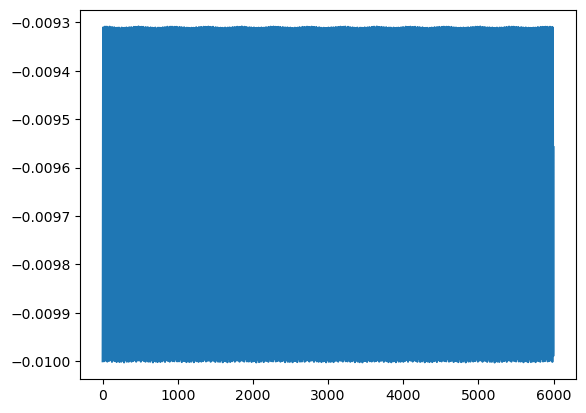

In [21]:
plt.plot(line.element_dict[f'{bpms_monitors[0]}_monitor'].delta[0][:6000])

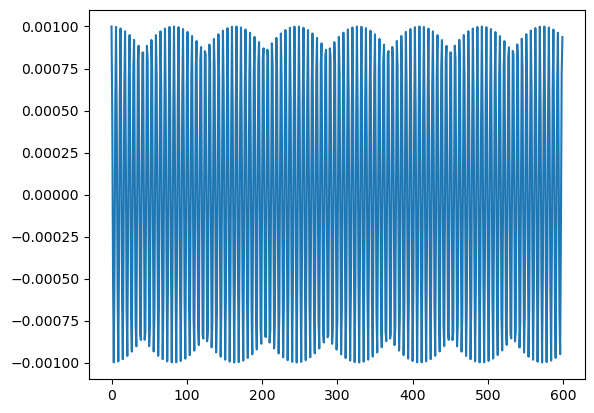

In [22]:
plt.plot(
    line.element_dict[f'{bpms_monitors[0]}_monitor'].delta[200][:6000:10]
)

In [ ]:
line.element_dict[f'{bpms_monitors[0]}_monitor']

ParticlesMonitor(start_at_turn=np.int64(0), stop_at_turn=np.int64(6001), part_id_start=np.int64(0), part_id_end=np.int64(441), ebe_mode=np.int64(0), n_records=np.int64(2646441), n_repetitions=np.int64(1), repetition_period=np.int64(-1), flag_auto_to_numpy=np.int64(1), data=Particles(q0=0, mass0=0, p0c=[2.592e+10, 2.592e+10, 2.592e+10, ..., 2.592e+10,
                2.592e+10, 0.000e+00], shape=(2646441,), gamma0=[27.64334239, 27.64334239, 27.64334239, ..., 27.64334239,
                27.64334239,  0.        ], shape=(2646441,), beta0=[0.99934547, 0.99934547, 0.99934547, ..., 0.99934547,
                0.99934547, 0.        ], shape=(2646441,), s=[63.62570354, 63.62570354, 63.62570354, ..., 63.62570354,
       63.62570354,  0.        ], shape=(2646441,), zeta=[ 3.76226192e-03,  1.28688310e-01,  2.52404376e-01, ...,
       -7.13438444e+02, -7.13559069e+02,  0.00000000e+00],
      shape=(2646441,), x=[-0.06433792, -0.0601061 , -0.05518167, ...,  0.02562709,
        0.03272085,  0.     

Save x, px, y, py, zeta, delta for each? And then do per chroma? And the initial distribution? So maybe add a monitor in 0? I guess the particle id is the same for all monitors?

In [ ]:
len(bpms_monitors)

42

In [ ]:
line.element_dict[f'{bpms_monitors[0]}_monitor'].x[0]

array([-0.06433792, -0.0601061 , -0.05518167, ..., -0.07084388,
       -0.06477202,  0.        ], shape=(6001,))

In [23]:
monitor_data = {}

for bpm in bpms_monitors:
    monitor = line.element_dict[f'{bpm}_monitor']
    monitor_data[bpm] = {
        'x': monitor.x.copy(),
        'y': monitor.y.copy(),
        'px': monitor.px.copy(),
        'py': monitor.py.copy(),
        'zeta': monitor.zeta.copy(),
        'delta': monitor.delta.copy()
    }